<a href="https://colab.research.google.com/github/loicpages/qmII_group_rep/blob/main/Southern_Africa_Export_and_Availability_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing libraries 
import pylab
import pandas as pd
import numpy as np
from google.colab import files
import io
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline
plt.style.use('ggplot')

In [4]:
#importing data with pandas 
data_path = '/content/df_final_use.csv'
general_df = pd.read_csv(data_path, encoding ='latin-1', sep=',')
general_df.fillna(0, inplace=True)
general_df

,Country,Year,Food Availibility per capita (kg/cap/year),Production Quantity (Grains & Ce.+ Root Crops)(1000MT),Import Quantity (Grains & Ce.)(1000MT),Export Quantity (Grains & Ce.)(1000MT),Import Quantity (Root Crops)(1000MT),Export Quantity (Root Crops)(1000MT),Population (Million),Non-Cereal Food Aid (Grain Equiv. 1000MT),Cereal Food Aid (Grain Equiv. 1000MT),Imports (all)(1000MT),Exports (all)(1000MT),Production Quantity per capita (kg/cap/year),Imports (all) per capita (kg/cap/year),Exports (all) per capita (kg/cap/year),Production + net ex-imports (kg/cap/year),Total Food Aid,Total Food Aid per capita (kg/cap/year),Region
0,Afghanistan,1980,0.000000,3933.805000,17.100,0.0,0.000000,0.0000,14.186,0.000000,0.000000,17.100000,0.0000,277.301917,1.205414,0.000000,278.507331,0.000000,0.000000,Central and East Asia
1,Afghanistan,1981,0.000000,3763.130000,96.500,0.0,0.000000,0.0000,13.984,0.000000,0.000000,96.500000,0.0000,269.102546,6.900744,0.000000,276.003289,0.000000,0.000000,Central and East Asia
2,Afghanistan,1982,0.000000,3602.788000,74.900,0.0,0.000000,0.0000,13.673,0.000000,0.000000,74.900000,0.0000,263.496526,5.477949,0.000000,268.974475,0.000000,0.000000,Central and East Asia
3,Afghanistan,1983,0.000000,3474.450000,79.503,0.0,0.000000,0.0000,13.300,0.000000,0.000000,79.503000,0.0000,261.236842,5.977669,0.000000,267.214511,0.000000,0.000000,Central and East Asia
4,Afghanistan,1984,0.000000,3306.778000,21.150,0.0,0.000000,0.0000,12.932,0.000000,0.000000,21.150000,0.0000,255.705073,1.635478,0.000000,257.340551,0.000000,0.000000,Central and East Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,Zimbabwe,2009,141.317483,1677.731196,576.300,0.0,2.163975,0.0144,12.474,69.115038,217.997711,578.463975,0.0144,134.498252,46.373575,0.001154,180.870673,287.112748,23.016895,Southern Africa
2580,Zimbabwe,2010,136.990970,1723.572567,368.600,0.0,2.163975,0.0144,12.571,34.650952,63.648974,370.763975,0.0144,137.107037,29.493594,0.001145,166.599486,98.299925,7.819579,Southern Africa
2581,Zimbabwe,2011,139.933312,1765.470308,640.000,0.0,2.163975,0.0144,12.754,24.445836,32.984747,642.163975,0.0144,138.424832,50.350006,0.001129,188.773709,57.430583,4.502947,Southern Africa
2582,Zimbabwe,2012,142.318797,1255.897663,620.000,0.0,2.163975,0.0144,13.014,16.082141,26.456731,622.163975,0.0144,96.503586,47.807283,0.001107,144.309762,42.538873,3.268701,Southern Africa


In [5]:
#scatter plots 
def plot_country(country, feature1, feature2, plot=True, show=True):
  country_feature1= general_df[general_df['Country']==country][feature1]
  df_feature1=pd.DataFrame(country_feature1)  

  country_feature2= general_df[general_df['Country']==country][feature2]
  df_feature2 =pd.DataFrame(country_feature2) 

  merged = df_feature1.merge(df_feature2, left_index=True, right_index=True)

  if plot:
    merged.plot(x=feature1, y=feature2, kind = 'scatter')
    plt.title(country)
  
  #linear regression line 
  x=merged[feature1]
  y=merged[feature2]
  x= x.to_numpy()
  y= y.to_numpy()
  m, b = np.polyfit(x, y, 1)
  if plot:
    plt.plot(x, m*x+b, c='red')
  if show:
    print(country)
    print(m)
    print(b)
  
  #Calculating the R square value for each country 
  temp= np.corrcoef(x,y)
  temp[0,1]**2
  rS2=temp[0,1]**2
  if show:
    print(rS2)

  corr = merged.corr()
  return corr


Zimbabwe
0.3740517780651065
156.97691469438638
0.21412631623501743
Zambia
-0.5505064129246806
171.17075271687298
0.07333969475178334
Swaziland
1.9514783245081229
160.04504912227551
0.27410428988570795
Namibia
0.1824295728611602
162.4783443939832
0.011425200267866895
Mozambique
4.848928903568185
173.16656412004593
0.2672262872637752
Malawi
0.5531510838586013
181.48776295246756
0.09585189750208566
Madagascar
2.281627108843856
180.74737519164043
0.05394445071433547
Lesotho
3.6107141003419465
177.51648881487762
0.17421013101671903


,Exports (all) per capita (kg/cap/year),Food Availibility per capita (kg/cap/year)
Exports (all) per capita (kg/cap/year),1.000000,0.417385
Food Availibility per capita (kg/cap/year),0.417385,1.000000


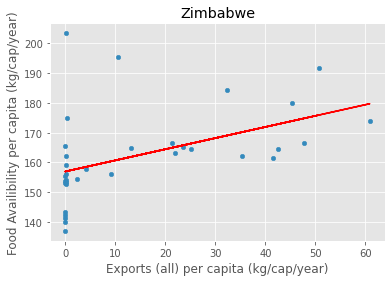

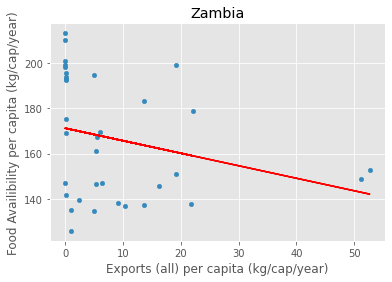

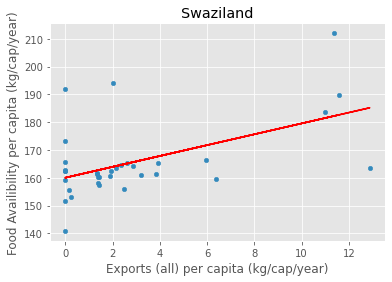

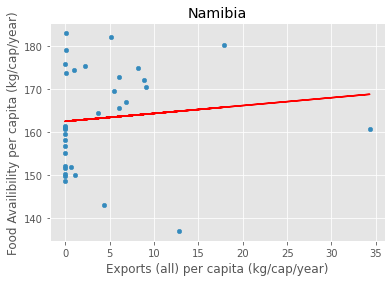

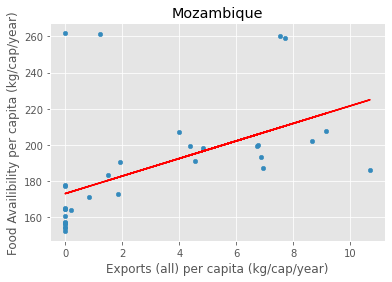

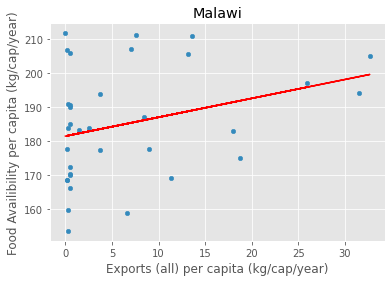

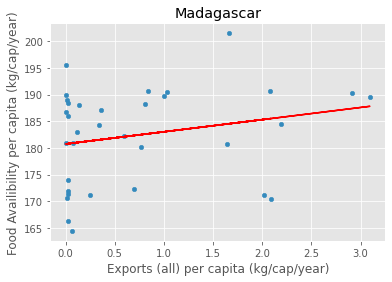

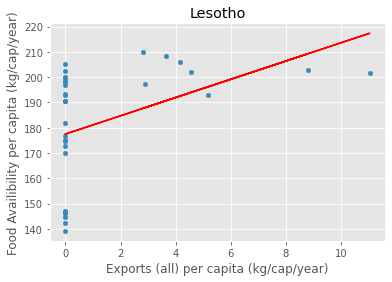

In [12]:
#calling the function for every country in Southern Africa - availability and export
plot_country('Zimbabwe','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Zambia','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Swaziland','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Namibia','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Mozambique','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Malawi','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Madagascar','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Lesotho','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')

In [14]:
#correlation coefficient - availability and export (all) 
countries = ['Zimbabwe', 'Zambia','Swaziland', 'Namibia', 'Mozambique','Malawi', 'Madagascar', 'Lesotho']

feature1= 'Food Availibility per capita (kg/cap/year)'
feature2= 'Exports (all) per capita (kg/cap/year)'

list_of_correlations = []

for country in countries : 
  corr = plot_country(country, feature1, feature2, False, False)
  list_of_correlations.append((country,corr))

for corr in list_of_correlations : 
  print(corr[0], corr[1])

Zimbabwe                                             Food Availibility per capita (kg/cap/year)  Exports (all) per capita (kg/cap/year)
Food Availibility per capita (kg/cap/year)                                    1.000000                                0.462738
Exports (all) per capita (kg/cap/year)                                        0.462738                                1.000000
Zambia                                             Food Availibility per capita (kg/cap/year)  Exports (all) per capita (kg/cap/year)
Food Availibility per capita (kg/cap/year)                                    1.000000                               -0.270813
Exports (all) per capita (kg/cap/year)                                       -0.270813                                1.000000
Swaziland                                             Food Availibility per capita (kg/cap/year)  Exports (all) per capita (kg/cap/year)
Food Availibility per capita (kg/cap/year)                                     1.0000